<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [57]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

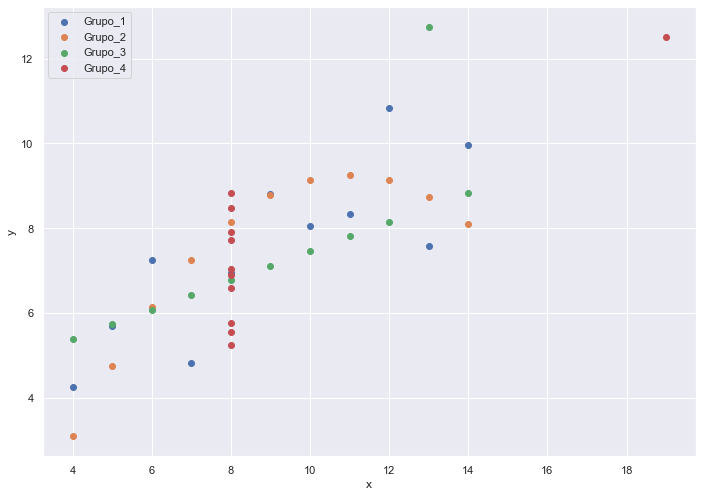

In [58]:
# Gráfique mediante un gráfico tipo scatter cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
# grafico de puntos

fig,ax = plt.subplots()
for i in range(1,5):
    i = 'Grupo_'+str(i)
    df_aux = df.loc[df['grupo']== i]
    x_axis = df_aux['x']
    y_axis = df_aux['y']
    ax.scatter(x_axis,y_axis,label=i)
    
    ax.legend()
    ax.grid(True)

    plt.xlabel('x')
    plt.ylabel('y')


In [31]:
# Realice un resumen de las medidas estadísticas más significativas ocuapando el comando describe para cada grupo. Interprete.
for i in range(1,5):
    i = 'Grupo_'+str(i)
    print(i)
    print(df.loc[df['grupo']== i].describe())
    print()

Grupo_1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Grupo_2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Grupo_3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Grupo_4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000

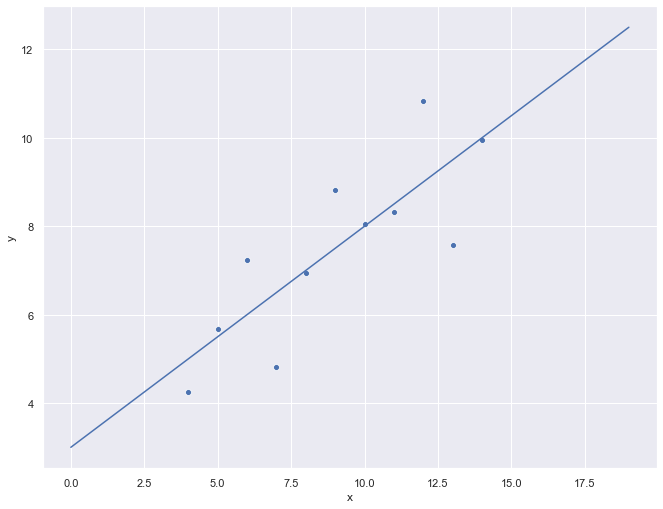

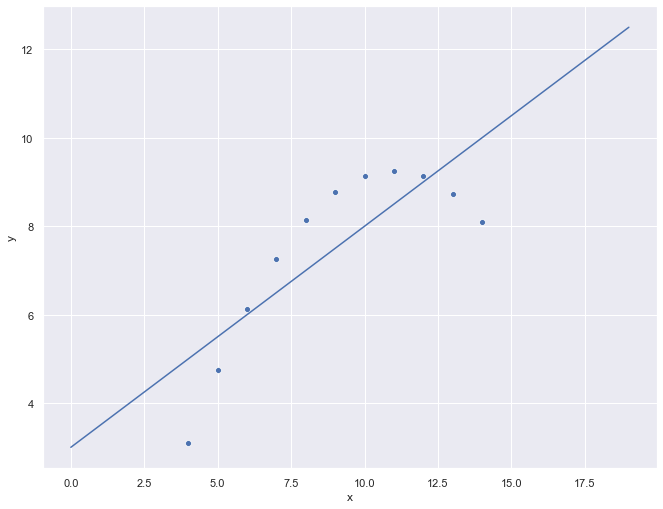

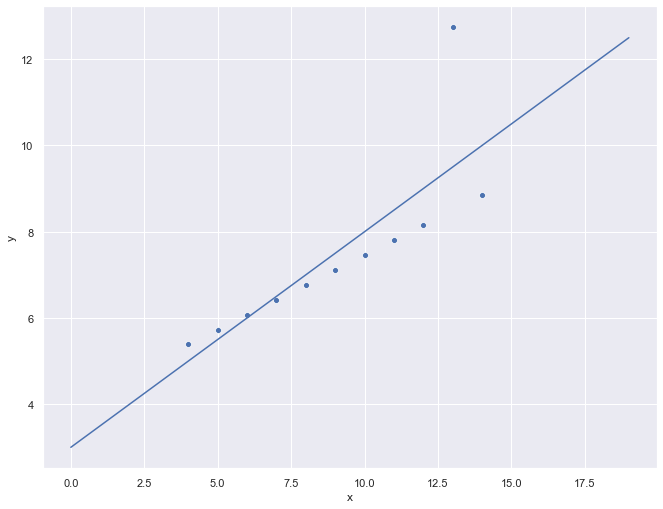

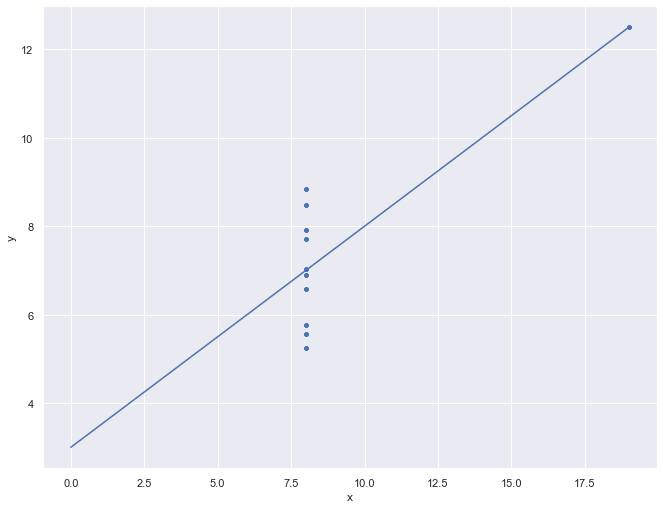

In [101]:
# Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
from sklearn import datasets
from sklearn.model_selection import train_test_split
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

for i in range(1,5):
    i = 'Grupo_'+str(i)
    df_aux = df.loc[df['grupo']== i]
    X=df.loc[df['grupo']==i]['x']
    Y=df.loc[df['grupo']==i]['y']
    X=pd.DataFrame(X)
    Y=pd.DataFrame(Y)
    
    model_rl = LinearRegression()
    model_rl.fit(X,Y)
    
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0][0]
    
        
    x_range = np.arange(0,19.1,1)
        
    df_plot = pd.DataFrame({'x':x_range, 'y':[float(beta_0 + beta_1*i) for i in x_range]})
  
    df_a = df_aux[['x','y']]
    
    fig, ax = plt.subplots(figsize=(11, 8.5))
        
    sns.scatterplot(x='x', y='y', data=df_a)
    sns.lineplot(x='x', y='y', data=df_plot)

    plt.xlabel('x')
    plt.ylabel('y')
plt.show()

In [157]:
# Calcule los resultados de las métricas para cada grupo. Interprete.
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo
for i in range(1,5):
    i = 'Grupo_'+str(i)
    df_aux = df.loc[df['grupo']== i]
    X=pd.DataFrame(df.loc[df['grupo']==i]['x'])
    Y=list(df.loc[df['grupo']==i]['y'])
    df_temp = pd.DataFrame({'y':Y,'yhat': list(model_rl.predict(pd.DataFrame(X)).reshape(1,-1)[0])})

    df_metrics = summary_metrics(df_temp)
    df_metrics['r2'] =  r2_score(Y, model_rl.predict(X))
    print('\nMetricas para el regresor '+i+':\n')
    print(df_metrics)


Metricas para el regresor Grupo_1:

      mae     mse    rmse    mape  maape   wmape   mmape   smape        r2
0  0.8373  1.2512  1.1185  0.1213  0.119  0.1116  0.1048  0.1167  0.666542

Metricas para el regresor Grupo_2:

      mae     mse    rmse   mape   maape  wmape   mmape   smape        r2
0  0.9679  1.2524  1.1191  0.157  0.1504  0.129  0.1315  0.1438  0.666242

Metricas para el regresor Grupo_3:

      mae     mse    rmse    mape   maape   wmape   mmape   smape        r2
0  0.7165  1.2506  1.1183  0.0798  0.0791  0.0955  0.0713  0.0815  0.666324

Metricas para el regresor Grupo_4:

      mae     mse    rmse    mape   maape   wmape   mmape   smape        r2
0  0.9027  1.2493  1.1177  0.1347  0.1324  0.1203  0.1167  0.1303  0.666707


In [ ]:
# Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema 
# (eliminar outliers, otros modelos, etc.). 
# Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera
# e implemente otros modelos en los casos que encuentre necesario.

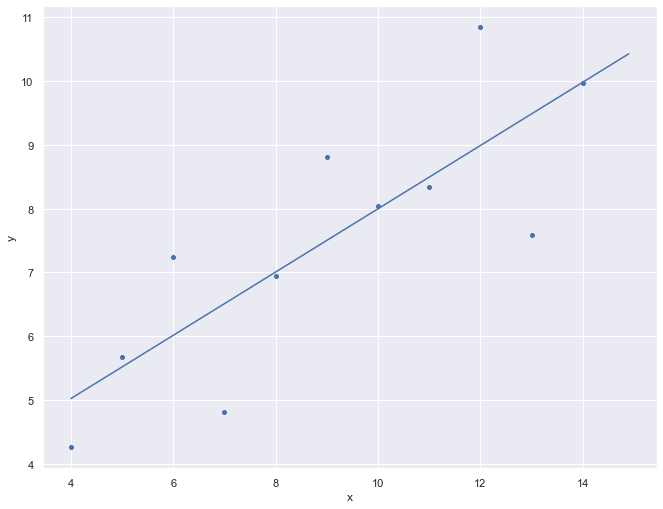


Metricas para el regresor Grupo_1:

      mae     mse    rmse    mape   maape   wmape   mmape   smape        r2
0  0.8349  1.2514  1.1186  0.1212  0.1189  0.1113  0.1046  0.1165  0.666488


In [216]:
#Para el Grupo_1, se tiene que:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn import datasets
from sklearn.model_selection import train_test_split
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

df_aux = df.loc[df['grupo']== 'Grupo_1']
X=df.loc[df['grupo']=='Grupo_1']['x']
Y=df.loc[df['grupo']=='Grupo_1']['y']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)
    
model_rl = Ridge(alpha=1.0)
model_rl.fit(X,Y)
    
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
    
        
x_range = np.arange(4,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range, 'y':[float(beta_0 + beta_1*i) for i in x_range]})
  
df_a = df_aux[['x','y']]
    
fig, ax = plt.subplots(figsize=(11, 8.5))
        
sns.scatterplot(x='x', y='y', data=df_a)
sns.lineplot(x='x', y='y', data=df_plot)

plt.xlabel('x')
plt.ylabel('y')
plt.show()
X=pd.DataFrame(df.loc[df['grupo']=='Grupo_1']['x'])
Y=list(df.loc[df['grupo']=='Grupo_1']['y'])

df_temp = pd.DataFrame({'y':Y,'yhat': list(model_rl.predict(pd.DataFrame(X)).reshape(1,-1)[0])})

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  r2_score(Y, model_rl.predict(X))
print('\nMetricas para el regresor '+'Grupo_1'+':\n')
print(df_metrics)

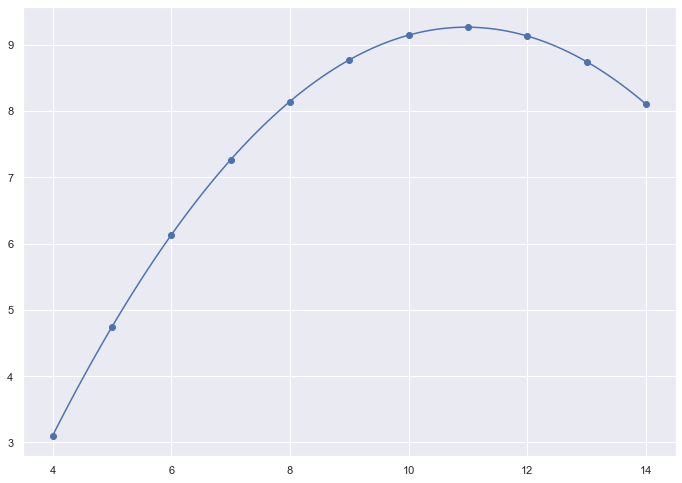

0.999999457857722

In [212]:
#Para el Grupo_2, se tiene que:
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

data= df.loc[df["grupo"]=="Grupo_2"]
X = data[["x"]].
y = data[["y"]]

X = data.x 
y = data.y
mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

myline = numpy.linspace(4, 14, 100)

plt.scatter(X, y)
plt.plot(myline, mymodel(myline))
plt.show()


r2_score(y, mymodel(X))

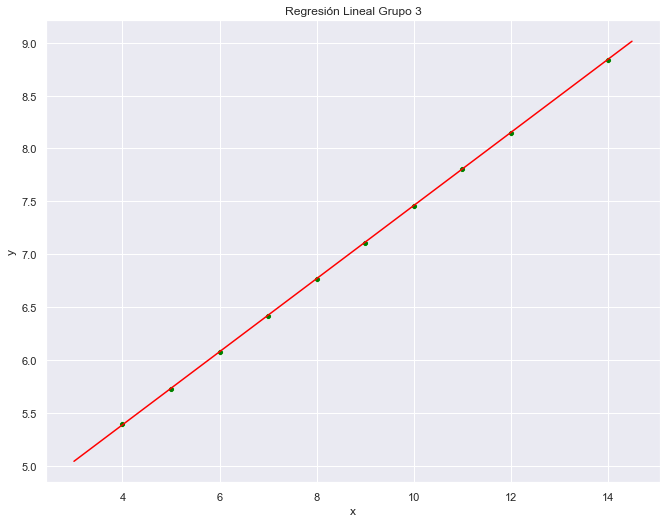

0.999993107581533

In [215]:
#Para el Grupo_3, se tiene que:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# import some data to play with
data= df.loc[df["grupo"]=="Grupo_3"]
mask=data["y"]<12 ##elimina outlaier
data= data[mask]
X = data[["x"]] # we only take the first two features.
y = data[["y"]]

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X, y) 
# graficos con seaborn

beta_0 = model_rl.intercept_[0]
beta_1 = model_rl.coef_[0]

x_range = np.arange(3,15,0.5)

df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1[0]*n for n in x_range]})

df2 = pd.DataFrame({'x':X['x'],'y_true':y['y']})

fig, ax = plt.subplots(figsize=(11, 8.5))


sns.scatterplot(x='x', y='y_true', data=df2, ax=ax,color="green")
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.title('Regresión Lineal Grupo 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_pred = model_rl.predict(X)

r2_score(y, y_pred)

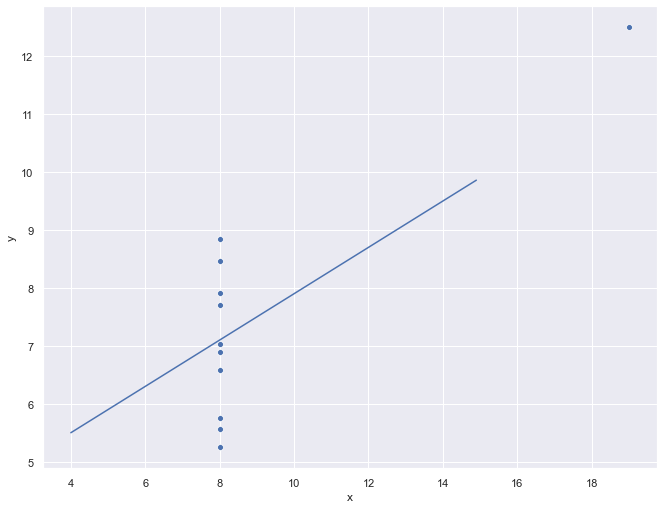


Metricas para el regresor Grupo_4:

      mae     mse    rmse    mape   maape   wmape   mmape   smape        r2
0  1.0047  1.3493  1.1616  0.1455  0.1429  0.1339  0.1262  0.1395  0.640029


In [219]:
#Para el Grupo_4, se tiene que:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

df_aux = df.loc[df['grupo']== 'Grupo_4']
X=df.loc[df['grupo']=='Grupo_4']['x']
Y=df.loc[df['grupo']=='Grupo_4']['y']
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)
    
model_rl = linear_model.Lasso(alpha=1.0)
model_rl.fit(X,Y)
    
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
    
        
x_range = np.arange(4,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range, 'y':[float(beta_0 + beta_1*i) for i in x_range]})
  
df_a = df_aux[['x','y']]
    
fig, ax = plt.subplots(figsize=(11, 8.5))
        
sns.scatterplot(x='x', y='y', data=df_a)
sns.lineplot(x='x', y='y', data=df_plot)

plt.xlabel('x')
plt.ylabel('y')
plt.show()
X=pd.DataFrame(df.loc[df['grupo']=='Grupo_4']['x'])
Y=list(df.loc[df['grupo']=='Grupo_4']['y'])

df_temp = pd.DataFrame({'y':Y,'yhat': list(model_rl.predict(pd.DataFrame(X)).reshape(1,-1)[0])})

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  r2_score(Y, model_rl.predict(X))
print('\nMetricas para el regresor '+'Grupo_4'+':\n')
print(df_metrics)